In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

# AR(1) Process

## Stationary

Text(0.5, 1.0, 'Stationary AR(1) Process')

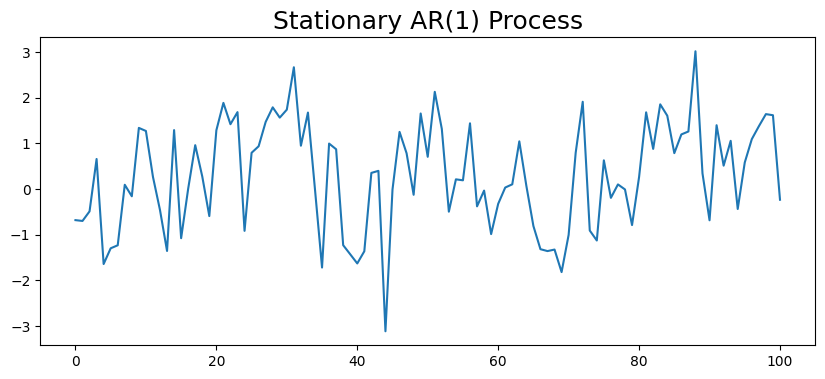

In [6]:
ar_1_process = generate_ar_process(1, [.5], 100) # phi = 0.5, less than one
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [5]:
perform_adf_test(ar_1_process)

ADF Statistic: -5.314563
p-value: 0.000005


#### ABOVE the p-value is less than 0.05, Hence Stationary

## Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

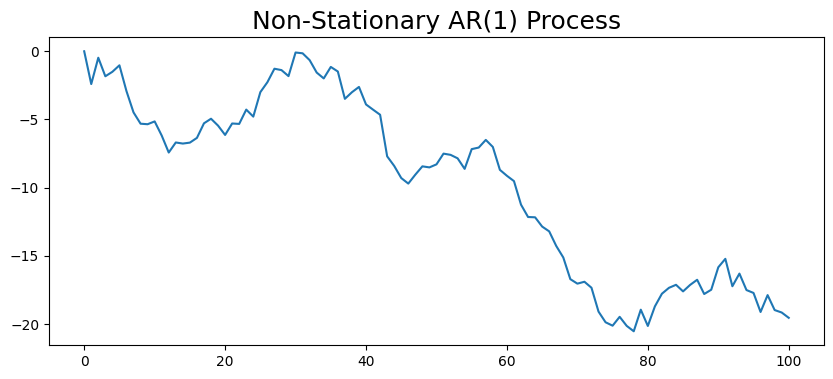

In [7]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100) # phi=1
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [8]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -0.710622
p-value: 0.843979


### Above the p value more than 0.05, Hence proves that it's non-stationary

# AR(2) Process

## Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

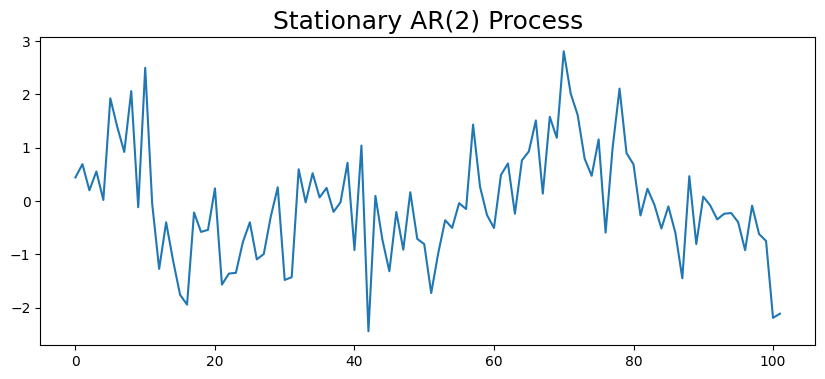

In [13]:
ar_2_process = generate_ar_process(2, [.5, .3], 100) # phi = 0.5+0.3--> less than one
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [10]:
perform_adf_test(ar_2_process)

ADF Statistic: -3.430438
p-value: 0.009964


### Above the p-lvaue also confirms that it's stationary

## Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

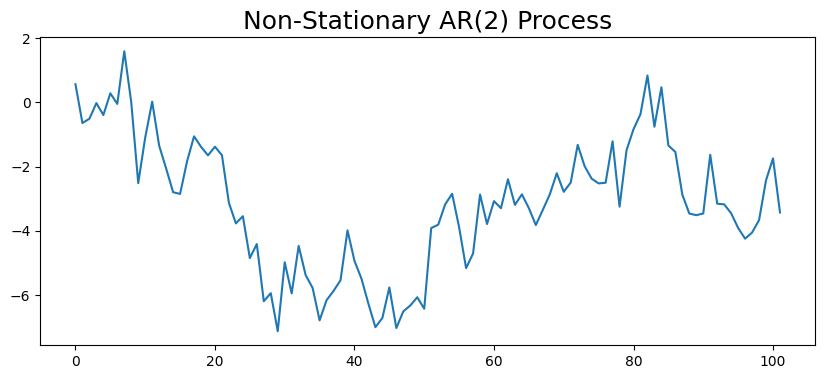

In [14]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100) # phi = 0.7+0.3--> one
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)

In [15]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistic: -2.206044
p-value: 0.204059


### Above the p-value confirms that it should be Non-stationary as p >0.05, can't reject the null hypothesis